In [4]:
from __future__ import  division
%matplotlib inline
from data_tools import draw_all_datasets, draw_bar_chart
from data_tools import get_dict_from_file, get_names_from_files, get_json_from_files
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.plotly as py
import plotly
import pyupset as pyu

In [5]:
# because I don't have number of appearances of individual labels in lsvrc_bb, I exclude it from the analysis
PATH = "datasets/"
dataset_filenames = {
    "coco":PATH+"coco.txt", 
    "voc":PATH+"pascal_voc.txt", 
    "voc_contex":PATH+"pascal_voc_context.txt", 
    "cocostuff":PATH+"cocostuff.txt",
    "citiscapes":PATH+"citiscraper.txt",
    "ade20k":PATH+"ade20k.txt"
}
total_number_of_pictures = {
    "coco":82783, 
    "voc":2913, 
    "voc_contex": 10103, 
    "cocostuff":82783,
    "citiscapes":5000,
    "ade20k": 22210
}

In [3]:
draw_all_datasets(dataset_filenames)

In [18]:
datasets = {}
for dataset in dataset_filenames:
    filename = dataset_filenames[dataset]
    datasets[dataset] = pd.DataFrame(get_json_from_files(filename))

In [19]:
datasets

{'ade20k':                         name  size
 0                  right leg  1335
 1     construction equipment     3
 2                       hats    20
 3            revolving doors     1
 4                     straws     2
 5             covered bridge    10
 6                  trash can   950
 7                    railing  1974
 8         elliptical machine     1
 9                     onions     5
 10                   trolley    81
 11                toilet kit     3
 12                     canes     6
 13               bed trolley     2
 14                   troller     1
 15                tree trunk    13
 16                  trousers   128
 17               plates rack     1
 18                 rock wall     1
 19                flip flops     2
 20             slum shanties     2
 21                   kennels     5
 22                   cockpot     1
 23         exercise machines     1
 24                   blanket   278
 25                  railways     2
 26               

In [13]:
from pickle import load
with open('./test_data_dict.pckl', 'rb') as f:
    data_dict = load(f)
data_dict

{'action':                                                  title  rating_avg  \
 0                             13th Warrior, The (1999)    3.158667   
 1          3 Ninjas: High Noon On Mega Mountain (1998)    1.361702   
 2                                    52 Pick-Up (1986)    3.300000   
 3                     7th Voyage of Sinbad, The (1958)    3.616279   
 4                                    Abyss, The (1989)    3.683965   
 5                          Aces: Iron Eagle III (1992)    1.640000   
 6                                Action Jackson (1988)    2.254054   
 7                      Adrenalin: Fear the Rush (1996)    1.545455   
 8                 Adventures of Robin Hood, The (1938)    3.973545   
 9                            African Queen, The (1951)    4.251656   
 10                                  Air America (1990)    2.754902   
 11                                Air Force One (1997)    3.588290   
 12                                        Alien (1979)    4.159585

In [14]:
data_dict.keys()

dict_keys(['romance', 'war', 'adventure', 'action'])

In [17]:
data_dict['war']

,title,rating_avg,rating_std,views
0,Aces: Iron Eagle III (1992),1.640000,0.953770,125
1,"African Queen, The (1951)",4.251656,0.820580,1057
2,Aliens (1986),4.125824,0.924347,1820
3,All Quiet on the Western Front (1930),4.194030,0.847801,268
4,And the Ship Sails On (E la nave va) (1984),3.250000,1.251315,20
5,Apocalypse Now (1979),4.243197,0.915328,1176
6,Bananas (1971),3.836022,0.891707,372
7,"Battleship Potemkin, The (Bronenosets Potyomki...",3.970085,1.041604,234
8,Bent (1997),3.571429,1.136224,28
9,"Best Years of Our Lives, The (1946)",4.122881,0.897838,236


{'additional': [],
 'base_set_size': <matplotlib.axes._subplots.AxesSubplot at 0x1dca323e320>,
 'figure': <matplotlib.figure.Figure at 0x1dca31a72b0>,
 'intersection_bars': <matplotlib.axes._subplots.AxesSubplot at 0x1dca52c5630>,
 'intersection_matrix': <matplotlib.axes._subplots.AxesSubplot at 0x1dca3298b38>,
 'names': <matplotlib.axes._subplots.AxesSubplot at 0x1dca31fafd0>}

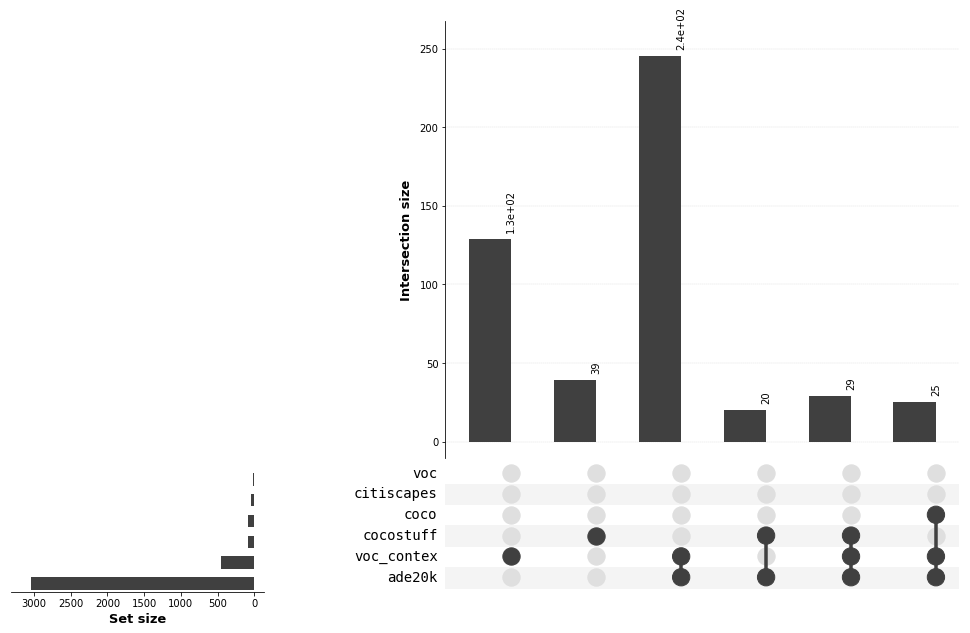

In [20]:
pyu.plot(datasets, unique_keys = ['name'], sort_by='degree', inters_size_bounds=(20, 400))